# Projet numérique : câble sous-marin

### Questions théoriques

**Question 1 :** Théorème Central Limite ?

**Question 2 :**

**Question 3 :**

**Question 4 :**

### Questions pratiques

**Définition des données et du code**

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
#Discretisation
A, B, N = 0, 500, 101
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta

#Parametres du modele
mu = -5
a = 50
sigma2 = 12

#Donnees
observation_indexes = [0, 20, 40, 60, 80, 100]
depth = np.array([0, -4, -12.8, -1, -6.5, 0])

#Indices des composantes correspondant aux observations et aux composantes non observees
unknown_indexes = list(set(discretization_indexes) - set(observation_indexes))

**Question 1**

In [ ]:
def cov(dist, a, sigma2):
    SIGMA = np.zeros(np.shape(dist))
    for i in range(len(dist)):
        for j in range(len(dist[0])):
            SIGMA[i][j] = sigma2*np.exp(-abs(dist[i][j])/a)
    return(SIGMA)

**Question 2**

In [ ]:
def distance(discretization):
    t = len(discretization)
    dist = np.zeros((t,t))
    #Construction de la matrice en utilisant sa propriete d'antisymetrie (en comptant les distances algebriquement)
    for i in range(1,t):
        for j in range(i):
            dist[i][j] = discretization[i] - discretization[j]
    dist = dist - dist.T
    return(dist)    

**Question 3**

In [ ]:
SIGMA = cov(distance(discretization), a, sigma2)

**Question 4**

In [ ]:
inconnues_indexes = np.array(sorted(list(set(discretization_indexes) - set(observation_indexes))))
cov_obs = np.array([[SIGMA[i][j] for j in observation_indexes] for i in observation_indexes])
cov_inc = np.array([[SIGMA[i][j] for j in inconnues_indexes] for i in inconnues_indexes])
cov_all = SIGMA

**Question 5** Dans le cas où on cherche l'espérance conditionnelle des composantes non observées connaissant les observations, si on note Y le vecteur des composantes non observées et Z celui des composantes observées, l'espérance conditionnelle de Y sachant Z est la variable aléatoire $m_Y - C_{Y,Z}C_Z^{-1}(Z-m_Z)$ avec $C_{Y,Z} = Cov(Y,Z)$, $C_Z = Cov(Z,Z)$ et $m_Y = \mathbb{E}(Y)$.
En reprenant les notations précédentes, $C_Z = cov\_obs$, $m_Y = m_Z = \mu$.

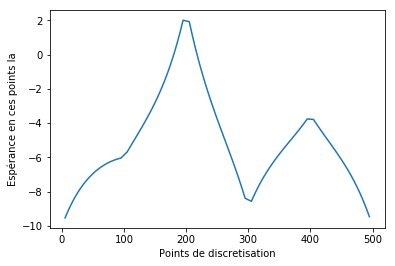

In [8]:
mY,mZ = np.array([mu]*(len(discretization_indexes)- len(observation_indexes))).T, np.array([mu]*len(observation_indexes)).T
Z = depth.T
CZ = cov_obs
CYZ = np.array([[SIGMA[i][j] for j in observation_indexes] for i in inconnues_indexes])
D = np.array(Z - mZ)
EY = mY - CYZ.dot(np.linalg.inv(CZ)).dot(D)
Y = np.array([discretization[i] for i in inconnues_indexes])
plt.plot(Y, EY)
plt.xlabel('Points de discretisation')
plt.ylabel('Espérance en ces points la')
plt.show()

**Question 6**

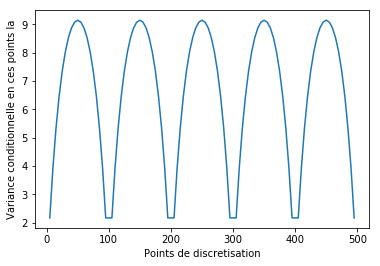

In [11]:
CY = cov_inc
M = CY - CYZ.dot(np.linalg.inv(CZ)).dot(CYZ.T)
DIAG = np.array([M[i][i] for i in range(len(M))])
plt.plot(Y, DIAG)
plt.xlabel('Points de discretisation')
plt.ylabel('Variance conditionnelle en ces points la')
plt.show()

Commentaire : à tous les points connus (0, 100, 200, 300, 400, 500), la variance est nulle (logique vu qu'on connaît les points). En revanche, plus on s'éloigne de ces points de connaissance, et moins précis le résultat est, d'où une augmentation de la variance entre deux points connus.